<a href="https://colab.research.google.com/github/BhavyaGoyal777/computeTasks/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
api_key='your_api_key'

In [23]:
import pandas as pd

In [43]:
import requests
headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get("https://api.tiingo.com/tiingo/daily/nvda/prices?startDate=2015-01-02&token=api_key", headers=headers)
json_data=requestResponse.json()

In [44]:
# msft_json=pd.read_json(json_data)
df = pd.DataFrame(json_data[1:], columns=json_data[0])


df.to_csv('output.csv', index=False)


In [45]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-05T00:00:00.000Z,19.790,20.19,19.700,20.13,4948799,0.475140,0.484743,0.472979,0.483303,197951960,0.0,1.0
1,2015-01-06T00:00:00.000Z,19.190,19.84,19.170,19.82,4944121,0.460734,0.476340,0.460254,0.475860,197764840,0.0,1.0
2,2015-01-07T00:00:00.000Z,19.135,19.50,19.080,19.33,8045186,0.459414,0.468177,0.458093,0.464095,321807440,0.0,1.0
3,2015-01-08T00:00:00.000Z,19.860,19.98,19.350,19.36,7094534,0.476820,0.479701,0.464576,0.464816,283781360,0.0,1.0
4,2015-01-09T00:00:00.000Z,19.940,20.09,19.655,19.93,5204700,0.478741,0.482342,0.471898,0.478501,208188000,0.0,1.0


In [46]:
df.shape

(2421, 13)

In [47]:
df1=df['close']

In [48]:
df1

,close
0,19.790
1,19.190
2,19.135
3,19.860
4,19.940
...,...
2416,109.020
2417,116.140
2418,118.080
2419,122.860


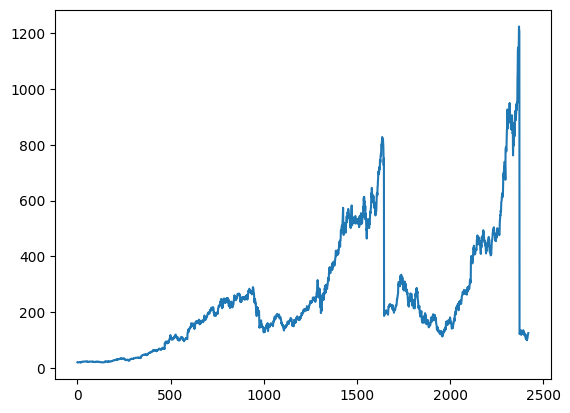

In [49]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [52]:
import numpy as np

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [56]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [58]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [60]:
time_step = 250
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [61]:
print(X_train.shape), print(y_train.shape)

(1564, 250)
(1564,)


(None, None)

In [63]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(250,1)))
model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 250, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 250, 75)             │          52,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          25,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,851 (464.26 KB)

 Trainable params: 118,851 (464.26 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=50,verbose=1)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 600ms/step - loss: 2.4242e-04 - val_loss: 0.0038
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 620ms/step - loss: 2.2592e-04 - val_loss: 0.0040
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 600ms/step - loss: 3.4420e-04 - val_loss: 0.0040
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 623ms/step - loss: 1.6606e-04 - val_loss: 0.0043
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 596ms/step - loss: 1.3560e-04 - val_loss: 0.0044
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 633ms/step - loss: 2.8145e-04 - val_loss: 0.0034
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 598ms/step - loss: 2.2799e-04 - val_loss: 0.0042
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 612ms/step - loss: 3.0388e-04 - val_loss: 0.0039
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 629ms/step - loss: 1.9842e-04 - val_loss: 0.0042
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step - loss: 2.9143e-04 - val_loss: 0.0039


In [73]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


In [74]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [75]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

291.31192331381874

In [76]:
math.sqrt(mean_squared_error(ytest,test_predict))

553.2300988048254

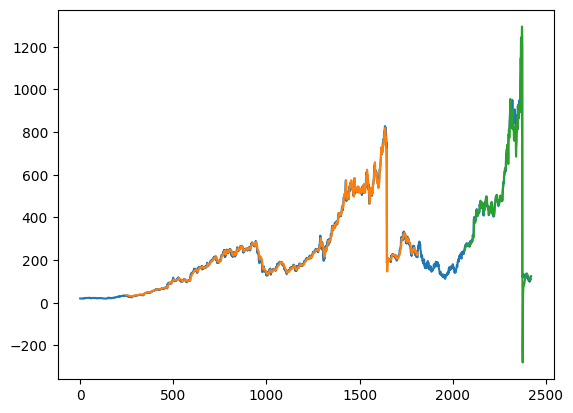

In [77]:
look_back=250
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [79]:
len(test_data)

606

In [80]:
x_input=test_data[356:].reshape(1,-1)
x_input.shape

(1, 250)

In [81]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
import numpy as np

# Assuming temp_input and model are already defined
lst_output = []
n_steps = 250
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
    else:
        x_input = np.array(temp_input)

    x_input = x_input.reshape((1, n_steps, 1))

    # Predict the next value
    yhat = model.predict(x_input, verbose=0)
    print(f"{i} day output: {yhat[0]}")

    # Update input and output lists
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[-n_steps:]  # Keep only the last n_steps elements
    lst_output.extend(yhat.tolist())

    i += 1

print(lst_output)


0 day output: [0.08121535]
1 day output: [0.08210924]
2 day output: [0.08218849]
3 day output: [0.08202901]
4 day output: [0.08189376]
5 day output: [0.08185479]
6 day output: [0.08190621]
7 day output: [0.08202051]
8 day output: [0.08216987]
9 day output: [0.08233239]
10 day output: [0.08249318]
11 day output: [0.08264352]
12 day output: [0.08277957]
13 day output: [0.08290102]
14 day output: [0.08300967]
15 day output: [0.08310843]
16 day output: [0.08320042]
17 day output: [0.08328849]
18 day output: [0.08337495]
19 day output: [0.0834614]
20 day output: [0.08354886]
21 day output: [0.0836378]
22 day output: [0.08372832]
23 day output: [0.08382027]
24 day output: [0.0839134]
25 day output: [0.08400738]
26 day output: [0.08410192]
27 day output: [0.08419675]
28 day output: [0.08429168]
29 day output: [0.08438658]
[[0.08121535181999207], [0.082109235227108], [0.08218849450349808], [0.08202901482582092], [0.08189375698566437], [0.08185479044914246], [0.08190621435642242], [0.0820205137